In [1]:
# imports
import matplotlib.pyplot as plt
import scipy.signal
import cv2
import numpy as np
from PIL import Image

In [6]:
# preprocess image: noise filtering, black&white, 
image = np.array(Image.open(r"captchas/49334.jpeg"))
image = cv2.blur(image, (3, 3))
ret, image = cv2.threshold(image, 178, 255, cv2.THRESH_BINARY)
image = cv2.dilate(image, np.ones((3,1), np.uint8))
image = cv2.erode(image, np.ones((2,2), np.uint8))
image = image.mean(axis=2)

In [ ]:
columns = image.mean(axis=0)

def find_letter_columns(columns):
    

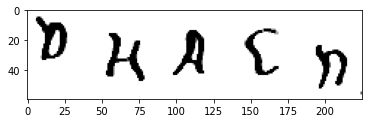

In [11]:
plt.imshow(image, cmap="gray")